In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

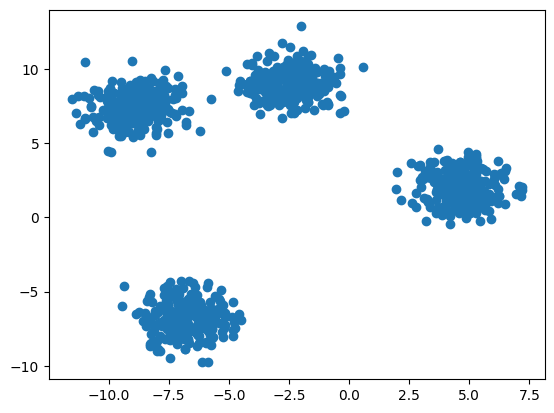

In [2]:
from sklearn.datasets import make_blobs
X,y =make_blobs(n_samples=1000,centers=4,n_features=2,random_state=42)
plt.scatter(X[:,0],X[:,1])

In [3]:
print(y)

[3 2 2 1 1 2 1 2 2 1 1 3 0 2 2 2 0 0 0 1 1 3 3 3 1 1 0 0 2 1 2 2 2 0 0 3 2
 1 3 3 1 2 1 3 1 3 0 1 3 1 2 0 1 3 0 3 0 0 0 2 2 0 2 3 1 0 2 2 1 0 3 0 1 2
 1 3 1 0 1 0 2 0 0 0 1 3 2 2 0 0 0 0 1 1 3 1 3 0 1 2 1 3 3 0 3 1 1 0 2 0 3
 2 1 1 1 1 2 3 2 1 0 2 3 1 3 2 1 3 2 1 0 2 1 3 1 3 0 2 1 1 0 0 3 3 3 1 1 0
 0 0 0 3 2 2 0 1 0 1 1 3 2 0 1 2 0 0 1 2 3 2 1 0 0 1 0 3 2 3 2 3 1 1 0 2 0
 2 1 3 0 2 1 0 1 1 0 3 2 2 2 3 0 2 1 0 1 1 2 0 1 2 2 3 2 2 1 0 2 0 3 1 3 3
 2 0 3 0 1 2 2 0 0 2 0 3 2 2 3 2 2 1 2 3 2 1 3 0 1 0 1 1 1 1 3 1 1 2 0 2 2
 1 1 1 3 1 3 3 2 1 0 3 1 0 1 2 0 3 1 3 2 1 3 2 3 1 2 0 0 2 0 3 3 0 2 2 2 0
 2 2 2 0 2 3 2 3 0 2 3 1 3 3 2 3 3 1 2 3 1 0 3 3 2 2 2 1 3 2 0 2 0 0 2 2 3
 3 2 0 3 1 3 1 3 2 2 1 0 1 3 3 0 0 0 0 0 1 0 0 2 1 0 3 1 2 2 1 3 1 3 3 3 2
 1 1 1 1 0 1 0 2 1 0 2 1 3 1 1 3 0 3 2 3 2 0 3 0 3 3 2 1 1 1 0 3 0 1 1 3 1
 0 0 3 1 0 3 2 3 2 2 0 3 1 0 1 0 0 0 3 2 3 1 2 0 0 3 0 3 2 3 2 2 0 3 3 3 1
 0 0 1 1 2 3 3 3 1 0 3 0 2 2 1 0 1 1 0 0 1 1 2 2 1 0 3 1 1 3 3 2 3 0 1 0 3
 1 3 2 1 0 1 2 0 1 0 2 0 

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)


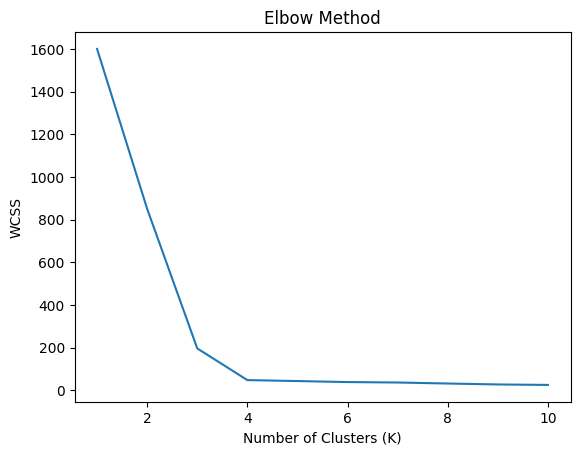

In [7]:
plt.plot(range(1,11),wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [8]:
model = KMeans(n_clusters=4,init='k-means++')
clusters =model.fit_predict(X_train)


In [9]:
clusters

array([2, 0, 1, 1, 0, 0, 0, 2, 3, 0, 0, 0, 3, 1, 3, 1, 2, 2, 3, 1, 1, 1,
       3, 2, 3, 1, 3, 0, 2, 0, 0, 2, 2, 3, 0, 1, 1, 2, 2, 3, 2, 2, 1, 3,
       3, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 3, 2, 0, 1, 2, 3,
       1, 1, 1, 2, 0, 1, 3, 2, 2, 2, 1, 0, 0, 2, 1, 3, 2, 3, 3, 1, 3, 3,
       1, 1, 2, 0, 0, 2, 1, 2, 3, 2, 1, 2, 3, 3, 3, 0, 1, 2, 1, 3, 2, 2,
       1, 0, 3, 3, 1, 0, 1, 0, 3, 1, 0, 0, 1, 1, 0, 2, 1, 0, 3, 3, 1, 3,
       1, 2, 3, 2, 2, 2, 2, 0, 0, 2, 0, 1, 3, 0, 0, 0, 0, 0, 2, 0, 3, 0,
       0, 1, 1, 0, 0, 3, 0, 3, 3, 3, 0, 1, 0, 2, 1, 1, 1, 3, 0, 2, 2, 0,
       2, 1, 0, 3, 1, 2, 3, 1, 3, 0, 3, 2, 2, 1, 1, 1, 1, 1, 1, 0, 3, 3,
       1, 2, 2, 1, 3, 2, 0, 0, 2, 3, 0, 2, 3, 3, 1, 3, 3, 3, 2, 0, 0, 2,
       0, 3, 1, 2, 0, 3, 0, 0, 3, 2, 0, 2, 0, 1, 1, 0, 0, 3, 3, 1, 0, 1,
       0, 3, 2, 3, 0, 1, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 3, 2, 2, 0, 1,
       1, 3, 2, 0, 2, 1, 3, 2, 1, 0, 3, 2, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3,
       2, 0, 1, 1, 1, 1, 3, 2, 1, 1, 0, 1, 3, 3, 2,

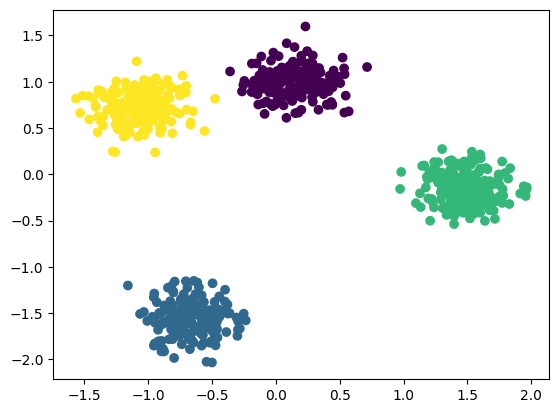

In [10]:
plt.scatter(X_train[:,0],X_train[:,1],c=clusters,cmap='viridis')

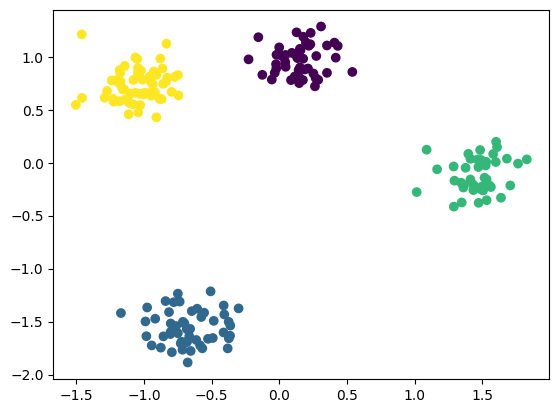

In [11]:
y_pred = model.predict(X_test)
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap='viridis')

Automatic k detecter without elbow method

In [12]:
from kneed import KneeLocator
knee =KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
print("Optimal number of clusters: ",knee.elbow)

Optimal number of clusters:  3


Performance


In [16]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_train,clusters)
print("Silhouette Score: ",score)

Silhouette Score:  0.7954234236774237


Performance for all k values

In [17]:
Silhouette_values =[]
for n_cluster in range(2,11):
    kmeans = KMeans(n_clusters=n_cluster,init='k-means++')
    cluster_labels = kmeans.fit_predict(X_train)
    silhouette_value = silhouette_score(X_train,cluster_labels)
    Silhouette_values.append(silhouette_value)
print(Silhouette_values)

[0.4780411730301599, 0.7397932296954791, 0.7954234236774237, 0.6863319664539119, 0.5240410142362815, 0.5564306377920037, 0.4177129247009395, 0.42748393389325, 0.45234813971800863]
